In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


In [6]:
file_encoding = 'cp1252'
df = pd.read_csv('spam.csv',encoding=file_encoding)

In [8]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5221,ham,"Jane babes not goin 2 wrk, feel ill after lst ...",NaN,NaN,NaN
1017,ham,Shall i send that exe to your mail id.,NaN,NaN,NaN
1767,ham,"K, want us to come by now?",NaN,NaN,NaN
5074,spam,"This is the 2nd attempt to contract U, you hav...",NaN,NaN,NaN
3603,ham,Hey morning what you come to ask:-) pa...,NaN,NaN,NaN
543,ham,4 oclock at mine. Just to bash out a flat plan.,NaN,NaN,NaN
189,ham,I jus reached home. I go bathe first. But my s...,NaN,NaN,NaN
527,ham,Yes! How is a pretty lady like you single?,NaN,NaN,NaN
4498,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
4798,ham,I dont know why she.s not getting your messages,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [ ]:
#Steps
# 1. Data Cleaning (Remove NaN etc)
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement

In [ ]:
## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 columns since most of them are null and onl few non-null

In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(10)

,v1,v2
4622,ham,U need my presnts always bcz U cant mis love. ...
2349,ham,Yar else i'll thk of all sorts of funny things.
811,ham,So there's a ring that comes with the guys cos...
3730,ham,Isn't frnd a necesity in life? imagine urself ...
1807,ham,Do have a nice day today. I love you so dearly.
133,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
2065,ham,Cos daddy arranging time c wat time fetch Ì_ m...
3659,ham,I will reach ur home in &lt;#&gt; minutes
3644,spam,wamma get laid?want real doggin locations sent...
116,spam,You are a winner U have been specially selecte...


In [14]:
#Renaming column v1 and v2    v1->target           v2->text
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
4213,ham,Ard 530 like dat lor. We juz meet in mrt stati...
136,ham,He is there. You call and meet him
4841,ham,"Awesome, that gonna be soon or later tonight?"
1451,ham,Ya! when are Ì_ taking ure practical lessons? ...
3288,spam,Camera - You are awarded a SiPix Digital Camer...
3608,ham,Joy's father is John. Then John is the ____ of...
2249,spam,"Thanks for your ringtone order, ref number R83..."
941,ham,Theyre doing it to lots of places. Only hospit...
1808,ham,Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
2334,ham,Do you like Italian food?


In [16]:
#Now convert ham->0  and spam->1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#Check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#Check duplicate values
df.duplicated().sum()

403

In [20]:
#Remove duplicates
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()   #No duplicate

0

In [22]:
df.shape

(5169, 2)

In [ ]:
#Step 2: EDA (Exploratory Data Analysis)


In [23]:
df['target'].value_counts()     #Find out number of ham(0) and spam(1)

0    4516
1     653
Name: target, dtype: int64

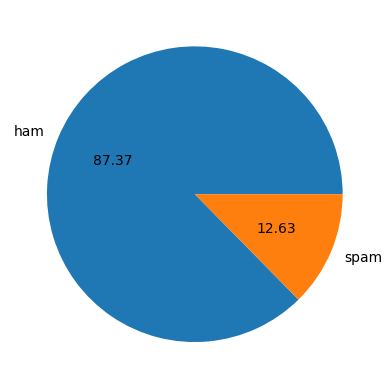

In [24]:
#pie chart with percentage
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#Conclusion: Imbalanced Dataset

In [ ]:
#Make three new columns following:

#Number of character
#Number of words
#Number of sentences



In [ ]:
import nltk
df['num_characters'] = df['text'].apply(len)    #number of characters column add


In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# num of words column add
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #breaking sms on the basis of words

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#Sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#describe ham messages
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#describe spam messages

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#spam messages are larger in length (number of char, word etc)

<Axes: xlabel='num_characters', ylabel='Count'>

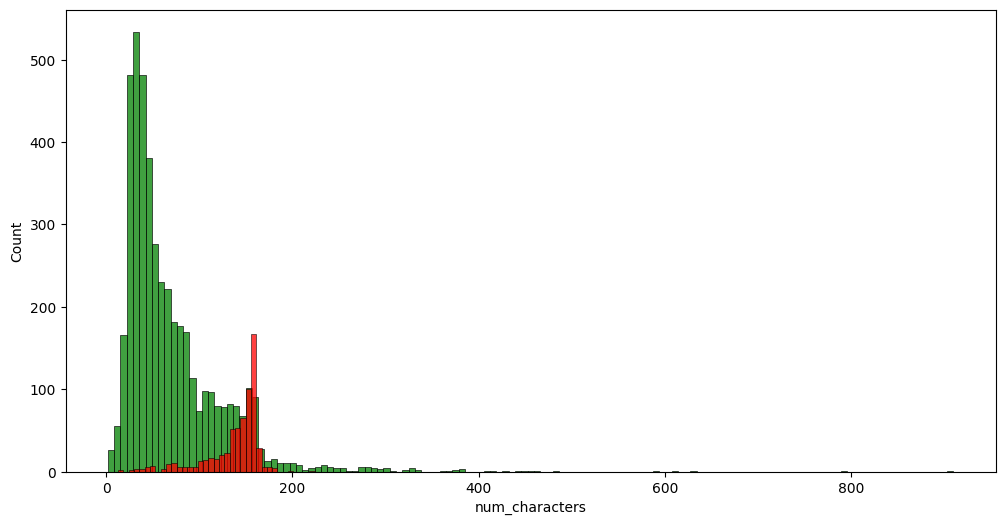

In [41]:
#plot for spam and ham
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='green')      #ham
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #spam

<ipython-input-42-c58d04ae56be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

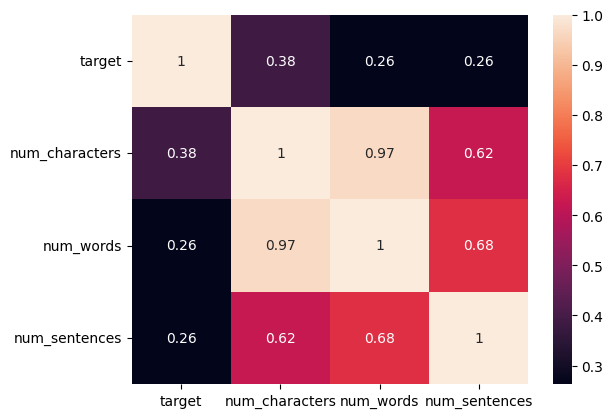

In [42]:
#correlation pearson

sns.heatmap(df.corr(),annot=True)

In [43]:
#Step 3: Text Pre-processing
# 1. convert to lower case
# 2. Tokenization
# 3. Removing Special character
# 4. Removing stop words and punctuation
# 5. stemming

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()


def transform_text(text):
    text = text.lower()   #lower case
    text = nltk.word_tokenize(text)    #tokenize

    y = []
    for i in text:
        if i.isalnum():    #special character (alpha numeric)
            y.append(i)

    #stopwords.words('english')     provide stop words of english

    text = y[:]    #Assign list y to text
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #stopwords removal
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))  #stemming


    return " ".join(y)

In [48]:
transform_text('I Loved the YT Lecture of Machine Learning. How about you?')    #sample example

'love yt lectur machin learn'

In [49]:
df['text'][0]    #from dataset

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)  #new column

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')   #most words in spam messages

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))  #for spam

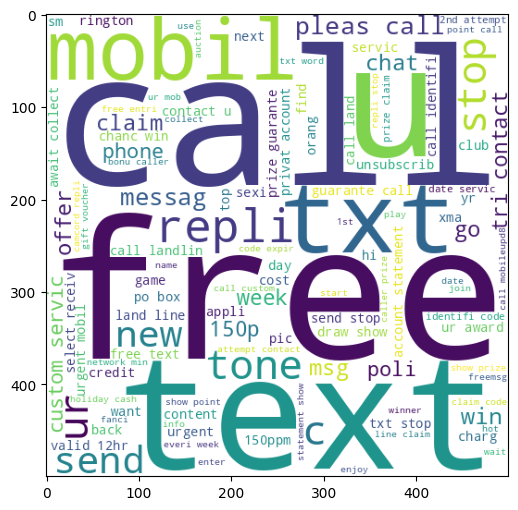

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

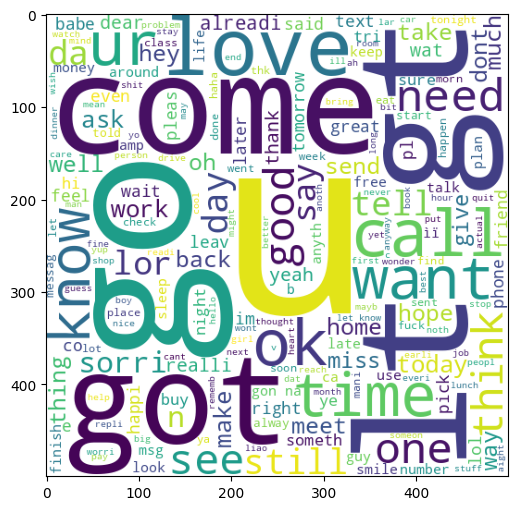

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
#Find top words used in spam and ham



In [58]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
#Model Building (Naive Bayes) (Naive Bayes works better with textual data)
#Need to vectorize the textual data using BOW, TF/IDF etc


In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 3000)

In [69]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB    #import naive bayes algo
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
#Gaussian Naive Bayes
gnb.fit(X_train,y_train)               #evaluation matrix
y_pred1 = gnb.predict(X_test)           #High Precision Model since we want to reduce true positive
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [77]:
#Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
#Bernoulii Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#Both multinomial and Bernoulli NB gives better precision score

In [ ]:
#tf/idf and multinomial NB selected

In [ ]:
#compare with other ML algo

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
#dictionary  key -> algo,  object-> value

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [81]:
#training
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [82]:
#example train on SVC
train_classifier(svc,X_train,y_train,X_test,y_test)     #accuarcy, precision

(0.9758220502901354, 0.9747899159663865)

In [84]:
#Now for every algorithm we train model and find out accuracy and precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0

For  NB
Accuracy -  0.9709864603481625
Precision -  1.0

For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829

For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659

For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192

For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [87]:
#store in table(data frame) sort basis on precision

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
#Improve performance of model

In [ ]:
# 1. Change the max_features parameter of TfIdf

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [90]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [92]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [96]:
from google.colab import files
files.download('model.pkl')
files.download('vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>